<a href="https://colab.research.google.com/github/vicpb/deep-learning-cnn-udemy/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow
!pip install -q tensorflow-gpu
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 454.3MB 37kB/s 
2.5.0


In [2]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
# Load in the data

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("X train.shape: ", x_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
X train.shape:  (60000, 28, 28)


In [4]:
# the data is only 2D!
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
# number os classes
K = len(set(y_train))
print("Number os classes: ", K)

Number os classes:  10


In [6]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [7]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5257 - accuracy: 0.8034 - val_loss: 0.4148 - val_accuracy: 0.8455
Epoch 2/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3641 - accuracy: 0.8633 - val_loss: 0.3456 - val_accuracy: 0.8716
Epoch 3/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3140 - accuracy: 0.8817 - val_loss: 0.3153 - val_accuracy: 0.8857
Epoch 4/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2791 - accuracy: 0.8939 - val_loss: 0.3067 - val_accuracy: 0.8904
Epoch 5/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2537 - accuracy: 0.9036 - val_loss: 0.3012 - val_accuracy: 0.8929
Epoch 6/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2325 - accuracy: 0.9127 - val_loss: 0.3022 - val_accuracy: 0.8967
Epoch 7/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2117 - accuracy: 0.9194 - val_loss: 0.2931 -

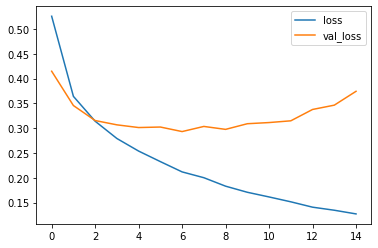

In [8]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

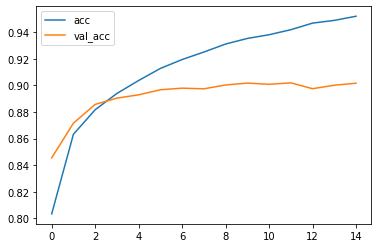

In [9]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[837   3  30  31   3   0  89   0   7   0]
 [  1 978   2  15   1   0   1   0   2   0]
 [ 14   0 871   8  50   0  53   0   4   0]
 [  7   4  21 924  29   0  13   0   2   0]
 [  0   1  70  18 828   0  79   0   4   0]
 [  0   0   0   1   1 975   0  18   0   5]
 [100   1  71  33  87   0 697   0  11   0]
 [  0   0   0   0   0  18   0 952   0  30]
 [  1   1   2   4   3   2   5   2 978   2]
 [  1   0   0   0   0   5   0  18   0 976]]


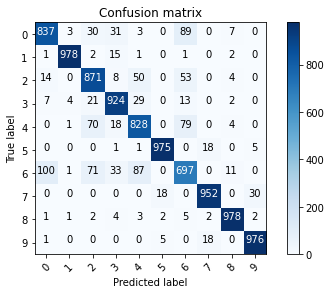

In [10]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization") 
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [11]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

Text(0.5, 1.0, 'True label: Shirt Predicted: T-shirt/top')

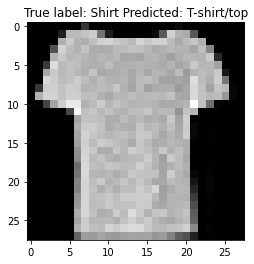

In [17]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))